In [1]:
import tensorflow as tf

In [2]:
def entr_and_dice(y_true, y_pred):
    def dice_loss(y_true, y_pred):
        numerator = 2 * tf.reduce_sum(y_true * y_pred, axis=(1, 2, 3))
        denominator = tf.reduce_sum(y_true + y_pred, axis=(1, 2, 3))
        return tf.reshape(1 - numerator / denominator, (-1, 1, 1))

    return tf.losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    # return K.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

def loss_wrapper(X,lambda_,model):
    def custom_loss(y_true, y_pred):
        return keras_loss(y_true,y_pred, X,lambda_,model)
    return custom_loss


In [3]:
new_model = tf.keras.models.load_model('tf_semseg_model.h5', compile=False)

In [4]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 416, 416, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 416, 416, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 208, 208, 32) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [5]:
new_model.compile(loss=entr_and_dice)

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [34]:
cur_path = os.getcwd()
print(cur_path)
img_path = cur_path+'\data\h5\hr_images'+'\\27_416.png'
print(img_path)

C:\Users\georg\fyp
C:\Users\georg\fyp\data\h5\hr_images\27_416.png


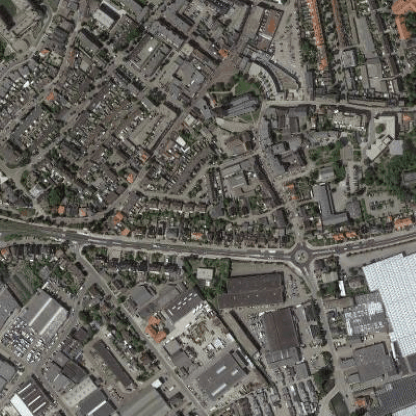

In [48]:
pimg = Image.open(img_path)
pimg

In [58]:
pix = np.array(pimg)/255
pix = pix[...,:3]

tpix = tf.expand_dims(pix, 0)


In [61]:
result = new_model(tpix)

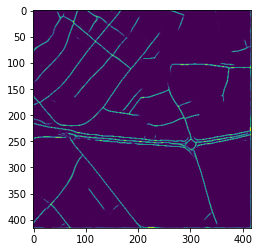

In [62]:
arr = np.squeeze(result) # you can give axis attribute if you wanna squeeze in specific dimension
plt.imshow(arr)
plt.show()